In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools

In [2]:
missing_val=  ['N/a', 'Na', np.nan]
df = pd.read_csv('Pov.csv', na_values= missing_val)

In [14]:
df.shape

(12600, 57)

#Cleaning Data

In [4]:
round(df.isnull().sum() / df.shape[0] * 100.00,2)

row_id                                    0.00
country                                   0.00
is_urban                                  0.00
age                                       0.00
female                                    0.00
married                                   0.00
religion                                  0.00
relationship_to_hh_head                   0.00
education_level                           1.87
literacy                                  0.00
can_add                                   0.00
can_divide                                0.00
can_calc_percents                         0.00
can_calc_compounding                      0.00
employed_last_year                        0.00
employment_category_last_year             0.00
employment_type_last_year                 0.00
share_hh_income_provided                  2.42
income_ag_livestock_last_year             0.00
income_friends_family_last_year           0.00
income_government_last_year               0.00
income_own_bu

In [5]:
#4 values above 90%. Will drop columns
df.drop('bank_interest_rate', axis = 1, inplace = True)
df.drop('mm_interest_rate', axis = 1, inplace = True)
df.drop('mfi_interest_rate', axis = 1, inplace = True)
df.drop('other_fsp_interest_rate', axis = 1, inplace = True)

In [6]:
round(df.isnull().sum() / df.shape[0] * 100.00,2)

row_id                                   0.00
country                                  0.00
is_urban                                 0.00
age                                      0.00
female                                   0.00
married                                  0.00
religion                                 0.00
relationship_to_hh_head                  0.00
education_level                          1.87
literacy                                 0.00
can_add                                  0.00
can_divide                               0.00
can_calc_percents                        0.00
can_calc_compounding                     0.00
employed_last_year                       0.00
employment_category_last_year            0.00
employment_type_last_year                0.00
share_hh_income_provided                 2.42
income_ag_livestock_last_year            0.00
income_friends_family_last_year          0.00
income_government_last_year              0.00
income_own_business_last_year     

##Binning

##Age

In [7]:
def agebin(row):
    if row.age >= 100:
        return '>=100'
    elif row.age <100 and row.age >=80:
        return '>=80-<100'
    elif row.age <80 and row.age >=60:
        return '>=60-<80'
    elif row.age <60 and row.age >=50:
        return '>=50-<60'
    elif row.age <50 and row.age >=40:
        return '>=40-<50'
    elif row.age <40 and row.age >=30:
        return '>=30-<40'
    elif row.age <30 and row.age >=18:
        return '>=18-<30'
    else:
        return '<18'

In [8]:
df['agebin'] = df.apply(agebin, axis='columns')

In [9]:
df.head()

,row_id,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,can_add,can_divide,can_calc_percents,can_calc_compounding,employed_last_year,employment_category_last_year,employment_type_last_year,share_hh_income_provided,income_ag_livestock_last_year,income_friends_family_last_year,income_government_last_year,income_own_business_last_year,income_private_sector_last_year,income_public_sector_last_year,num_times_borrowed_last_year,borrowing_recency,formal_savings,informal_savings,cash_property_savings,has_insurance,has_investment,num_shocks_last_year,avg_shock_strength_last_year,borrowed_for_emergency_last_year,borrowed_for_daily_expenses_last_year,borrowed_for_home_or_biz_last_year,phone_technology,can_call,can_text,can_use_internet,can_make_transaction,phone_ownership,advanced_phone_use,reg_bank_acct,reg_mm_acct,reg_formal_nbfi_account,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability,agebin
0,0,C,False,18,True,True,P,Other,1.0,True,True,True,True,True,False,housewife_or_student,not_working,1.0,False,False,False,False,False,False,0,0,False,False,False,False,False,0,0.0,False,False,False,0,True,True,False,False,1,False,True,False,False,True,True,False,False,False,False,1,0,1,0.515,>=18-<30
1,1,C,True,30,True,True,P,Other,1.0,True,True,True,False,False,False,housewife_or_student,not_working,NaN,False,False,False,False,False,False,0,0,False,False,False,False,False,0,0.0,False,False,False,1,True,False,False,False,2,False,True,False,False,True,True,False,False,False,False,1,0,0,0.981,>=30-<40
2,2,A,False,20,True,True,Q,Spouse,1.0,True,True,True,True,False,True,employed,irregular_seasonal,1.0,False,False,False,False,False,False,1,2,False,False,False,False,False,0,0.0,False,False,False,1,True,False,False,False,2,False,False,False,False,False,False,False,False,False,False,0,0,0,0.982,>=18-<30
3,3,A,False,61,False,True,Q,Head,0.0,False,True,True,False,True,True,employed,self_employed,NaN,False,False,False,False,False,False,0,0,False,False,False,False,False,0,0.0,False,False,False,0,True,False,False,False,0,False,False,False,False,False,False,False,False,False,False,0,0,0,0.879,>=60-<80
4,4,D,False,26,True,True,X,Spouse,1.0,True,False,True,False,False,False,housewife_or_student,not_working,2.0,False,True,False,False,False,False,0,0,False,False,True,False,False,0,0.0,False,False,False,0,True,True,False,True,1,False,False,False,False,False,False,False,False,False,False,1,0,3,0.796,>=18-<30


In [10]:
df.describe()

,row_id,age,education_level,share_hh_income_provided,num_times_borrowed_last_year,borrowing_recency,num_shocks_last_year,avg_shock_strength_last_year,phone_technology,phone_ownership,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability
count,12600.000000,12600.000000,12364.000000,12295.000000,12600.000000,12600.000000,12600.000000,12600.000000,12600.00000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000
mean,6299.500000,36.280714,1.316241,2.888166,0.657698,0.866429,1.100159,2.112765,1.20873,1.468254,0.714127,0.188968,1.559683,0.611272
std,3637.451031,15.145945,0.905442,1.564284,0.924598,0.960866,1.190072,2.019239,1.09306,0.776638,0.805878,0.473696,2.043831,0.291476
min,0.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3149.750000,25.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.394000
50%,6299.500000,33.000000,1.000000,2.000000,0.000000,0.000000,1.000000,2.000000,1.00000,2.000000,1.000000,0.000000,1.000000,0.633000
75%,9449.250000,45.000000,2.000000,5.000000,1.000000,2.000000,2.000000,4.000000,2.00000,2.000000,1.000000,0.000000,3.000000,0.879000
max,12599.000000,115.000000,3.000000,5.000000,3.000000,2.000000,5.000000,5.000000,3.00000,2.000000,6.000000,4.000000,10.000000,1.000000


#Analysis

###Getting Unique Values

In [13]:
def count_unique(df, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(df[col].value_counts(normalize = True)*100)

cat_cols = ['agebin','country','is_urban','female','married','religion','relationship_to_hh_head',
 'education_level','literacy','can_add','can_divide','can_calc_percents','can_calc_compounding',
 'employed_last_year','employment_category_last_year','employment_type_last_year',
 'income_ag_livestock_last_year','income_friends_family_last_year','income_government_last_year',
 'income_own_business_last_year','income_private_sector_last_year','income_public_sector_last_year',
 'borrowing_recency','formal_savings','informal_savings','cash_property_savings',
 'has_insurance','has_investment','borrowed_for_emergency_last_year','borrowed_for_daily_expenses_last_year',
 'borrowed_for_home_or_biz_last_year','phone_technology','can_call','can_text','can_use_internet',
 'can_make_transaction','phone_ownership','advanced_phone_use','reg_bank_acct',
 'reg_mm_acct','reg_formal_nbfi_account','financially_included','active_bank_user',
 'active_mm_user','active_formal_nbfi_user','active_informal_nbfi_user','nonreg_active_mm_user', 'share_hh_income_provided', 
'num_times_borrowed_last_year','num_shocks_last_year','num_formal_institutions_last_year',
            'num_informal_institutions_last_year']

count_unique(df, cat_cols)
df.shape


For column agebin
>=18-<30     34.000000
>=30-<40     24.698413
>=40-<50     16.317460
>=50-<60      9.928571
>=60-<80      8.809524
<18           5.301587
>=80-<100     0.888889
>=100         0.055556
Name: agebin, dtype: float64

For column country
J    14.626984
D    14.515873
I    14.380952
G    14.325397
A    14.071429
C    14.039683
F    14.039683
Name: country, dtype: float64

For column is_urban
False    67.142857
True     32.857143
Name: is_urban, dtype: float64

For column female
True     55.777778
False    44.222222
Name: female, dtype: float64

For column married
True     64.857143
False    35.142857
Name: married, dtype: float64

For column religion
Q    43.404762
X    42.039683
P    13.444444
O     0.674603
N     0.436508
Name: religion, dtype: float64

For column relationship_to_hh_head
Head              41.500000
Spouse            33.031746
Son/Daughter      17.277778
Father/Mother      3.293651
Other              2.547619
Sister/Brother     2.206349
Unknown           

(12600, 57)

###Sex

In [ ]:
##For column female
True     55.777778
False    44.222222

Text(0, 0.5, 'Count of People')

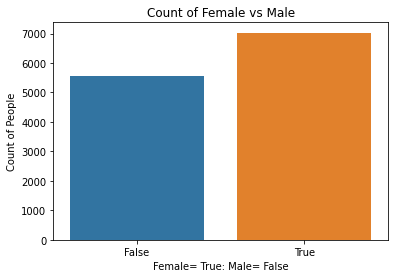

In [12]:
ax= sns.countplot(x="female", data=df)
plt.title('Count of Female vs Male') 
plt.xlabel('Female= True: Male= False')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

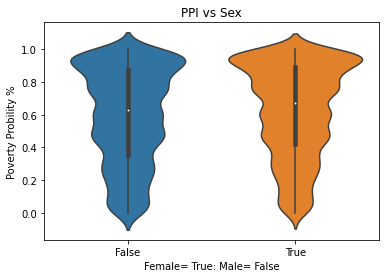

In [20]:
sns.violinplot(x ="female", y ="poverty_probability",
data = df, split = True)
plt.title('PPI vs Sex') 
plt.xlabel('Female= True: Male= False')
plt.ylabel('Poverty Probility %')

###Age


In [ ]:
#Age Ranges
>=18-<30     34.000000
>=30-<40     24.698413
>=40-<50     16.317460
>=50-<60      9.928571
>=60-<80      8.809524
<18           5.301587
>=80-<100     0.888889
>=100         0.055556

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

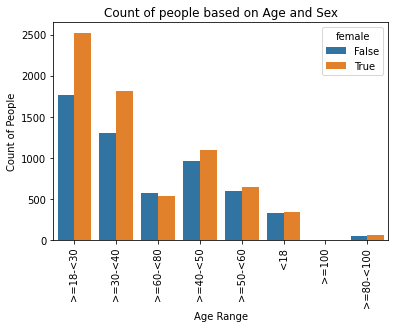

In [15]:
ax= sns.countplot(x="agebin", data=df, hue= 'female')
plt.title('Count of people based on Age and Sex') ##\n adds a new line
plt.xlabel('Age Range')
plt.ylabel('Count of People')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

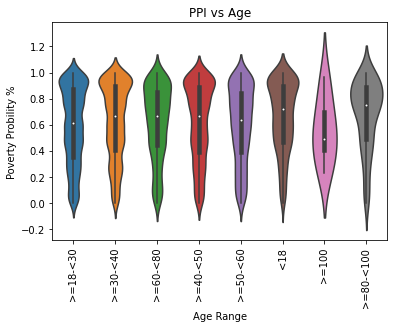

In [22]:
sns.violinplot(x ="agebin", y ="poverty_probability",
data = df, split = True)
plt.title('PPI vs Age') 
plt.xlabel('Age Range')
plt.ylabel('Poverty Probility %')
plt.xticks(rotation=90)

###Country

Text(0, 0.5, 'Count of People')

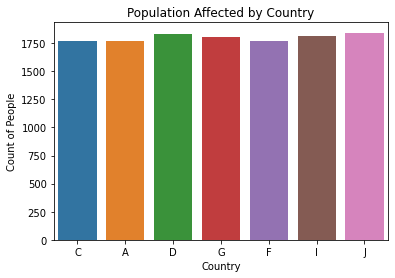

In [28]:
ax= sns.countplot(x="country", data=df,)
plt.title('Population Affected by Country') 
plt.xlabel('Country')
plt.ylabel('Count of People')

Text(0, 0.5, 'Count of People')

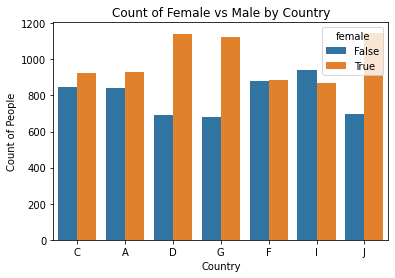

In [29]:
ax= sns.countplot(x="country", data=df, hue= 'female')
plt.title('Count of Female vs Male by Country') 
plt.xlabel('Country')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

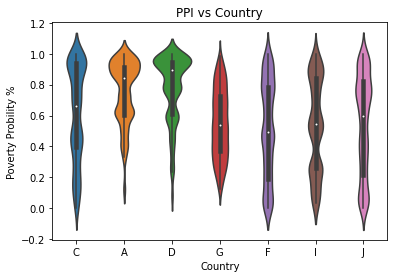

In [57]:
sns.violinplot(x ="country", y ="poverty_probability",
data = df, split = True)
plt.title('PPI vs Country') 
plt.xlabel('Country')
plt.ylabel('Poverty Probility %')


###Urban

Text(0, 0.5, 'Count of People')

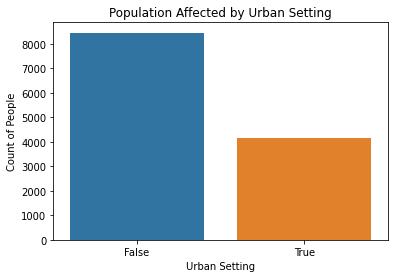

In [35]:
ax= sns.countplot(x="is_urban", data=df,)
plt.title('Population Affected by Urban Setting') 
plt.xlabel('Urban Setting')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

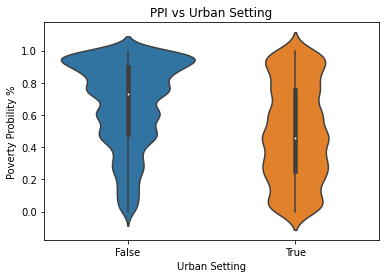

In [37]:
sns.violinplot(x ="is_urban", y ="poverty_probability",
data = df, split = True)
plt.title('PPI vs Urban Setting') 
plt.xlabel('Urban Setting')
plt.ylabel('Poverty Probility %')


###Married

Text(0, 0.5, 'Count of People')

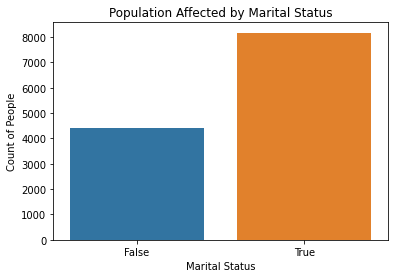

In [43]:
ax= sns.countplot(x="married", data=df,)
plt.title('Population Affected by Marital Status') 
plt.xlabel('Marital Status')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

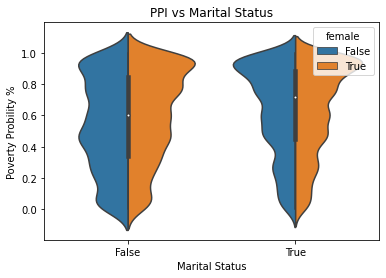

In [51]:
sns.violinplot(x ="married", y ="poverty_probability", hue='female',
data = df, split = True,)
plt.title('PPI vs Marital Status') 
plt.xlabel('Marital Status')
plt.ylabel('Poverty Probility %')


### Relationship to Head of House Hold

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

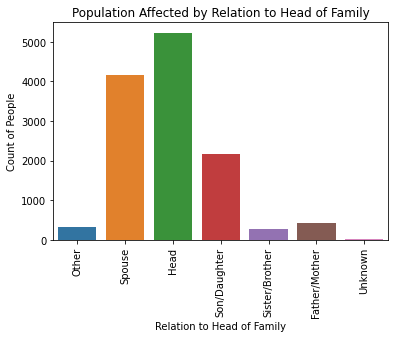

In [56]:
ax= sns.countplot(x="relationship_to_hh_head", data=df,)
plt.title('Population Affected by Relation to Head of Family') 
plt.xlabel('Relation to Head of Family')
plt.ylabel('Count of People')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

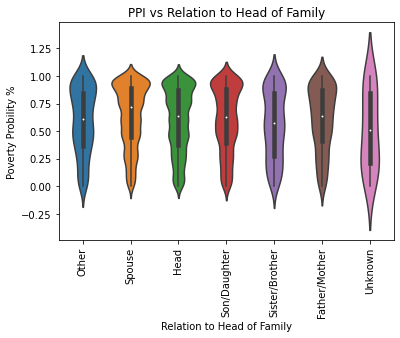

In [58]:
sns.violinplot(x ="relationship_to_hh_head", y ="poverty_probability",
data = df, split = True,)
plt.title('PPI vs Relation to Head of Family') 
plt.xlabel('Relation to Head of Family')
plt.ylabel('Poverty Probility %')
plt.xticks(rotation=90)

### Education Level

Text(0, 0.5, 'Count of People')

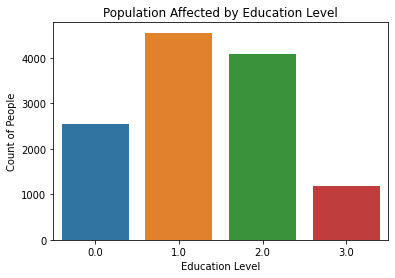

In [65]:
ax= sns.countplot(x="education_level", data=df, )
plt.title('Population Affected by Education Level') 
plt.xlabel('Education Level')
plt.ylabel('Count of People')


Text(0, 0.5, 'Count of People')

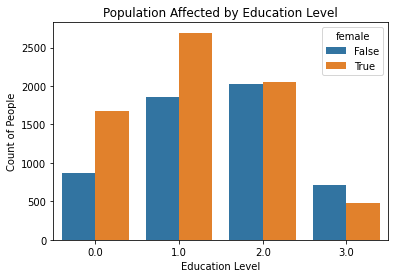

In [64]:
ax= sns.countplot(x="education_level", data=df, hue='female')
plt.title('Population Affected by Education Level') 
plt.xlabel('Education Level')
plt.ylabel('Count of People')


Text(0, 0.5, 'Poverty Probility %')

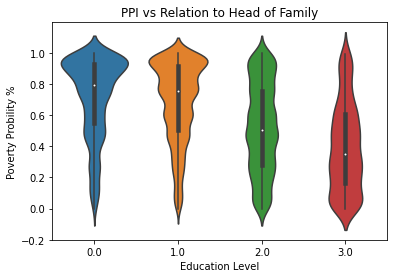

In [67]:
sns.violinplot(x ="education_level", y ="poverty_probability",
data = df, split = True,)
plt.title('PPI vs Relation to Head of Family') 
plt.xlabel('Education Level')
plt.ylabel('Poverty Probility %')


### Literacy

Text(0, 0.5, 'Count of People')

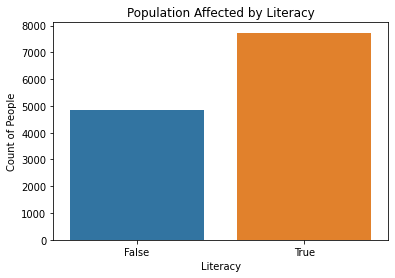

In [68]:
ax= sns.countplot(x="literacy", data=df, )
plt.title('Population Affected by Literacy') 
plt.xlabel('Literacy')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

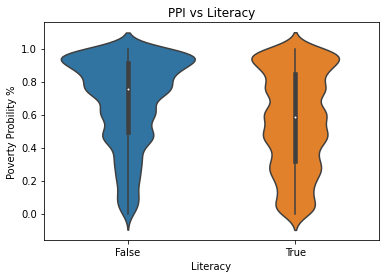

In [69]:
sns.violinplot(x ="literacy", y ="poverty_probability",
data = df, split = True,)
plt.title('PPI vs Literacy') 
plt.xlabel('Literacy')
plt.ylabel('Poverty Probility %')

###Religion

Text(0, 0.5, 'Count of People')

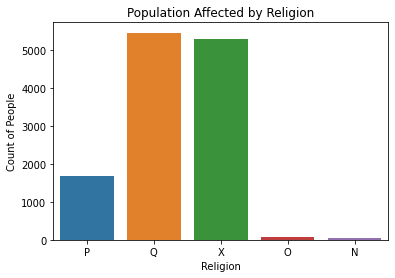

In [70]:
ax= sns.countplot(x="religion", data=df, )
plt.title('Population Affected by Religion') 
plt.xlabel('Religion')
plt.ylabel('Count of People')

Text(0, 0.5, 'Count of People')

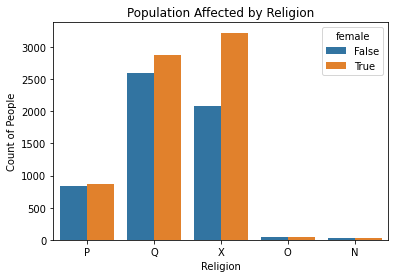

In [72]:
ax= sns.countplot(x="religion", data=df, hue='female' )
plt.title('Population Affected by Religion') 
plt.xlabel('Religion')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

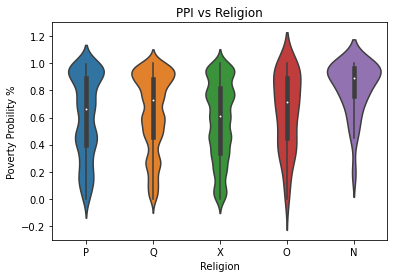

In [71]:
sns.violinplot(x ="religion", y ="poverty_probability",
data = df, split = True,)
plt.title('PPI vs Religion') 
plt.xlabel('Religion')
plt.ylabel('Poverty Probility %')

Text(0, 0.5, 'Poverty Probility %')

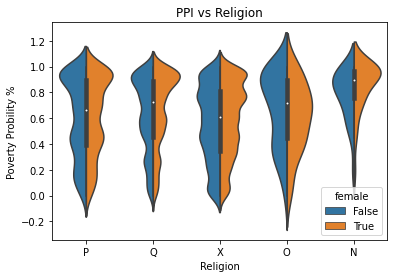

In [74]:
sns.violinplot(x ="religion", y ="poverty_probability", hue='female',
data = df, split = True,)
plt.title('PPI vs Religion') 
plt.xlabel('Religion')
plt.ylabel('Poverty Probility %')

###Employed Last Year

Text(0, 0.5, 'Count of People')

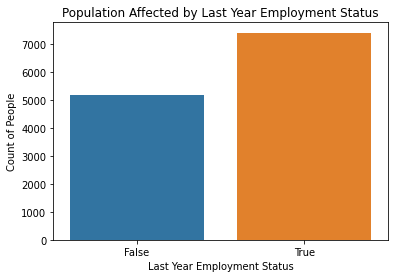

In [77]:
ax= sns.countplot(x="employed_last_year", data=df, )
plt.title('Population Affected by Last Year Employment Status') 
plt.xlabel('Last Year Employment Status')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

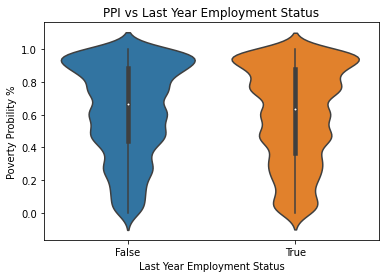

In [78]:
sns.violinplot(x ="employed_last_year", y ="poverty_probability",
data = df, split = True,)
plt.title('PPI vs Last Year Employment Status') 
plt.xlabel('Last Year Employment Status')
plt.ylabel('Poverty Probility %')

### Income: from livestock


Text(0, 0.5, 'Count of People')

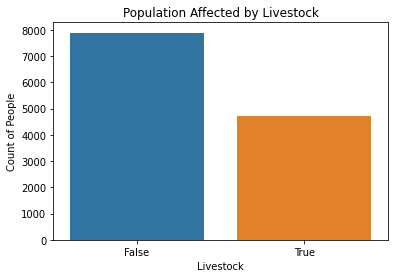

In [80]:
ax= sns.countplot(x="income_ag_livestock_last_year", data=df, )
plt.title('Population Affected by Livestock') 
plt.xlabel('Livestock')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

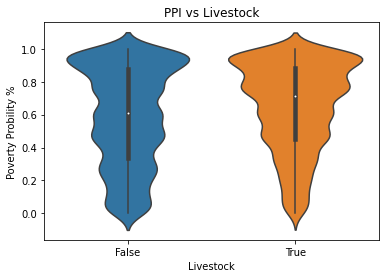

In [81]:
sns.violinplot(x ="income_ag_livestock_last_year", y ="poverty_probability",
data = df, split = True,)
plt.title('PPI vs Livestock') 
plt.xlabel('Livestock')
plt.ylabel('Poverty Probility %')

### Income: from friends and family

Text(0, 0.5, 'Count of People')

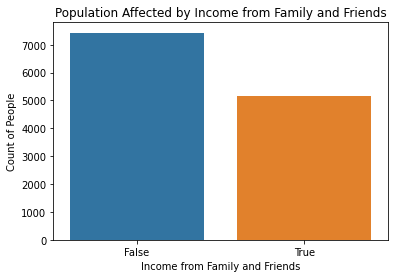

In [82]:
ax= sns.countplot(x="income_friends_family_last_year", data=df, )
plt.title('Population Affected by Income from Family and Friends') 
plt.xlabel('Income from Family and Friends')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

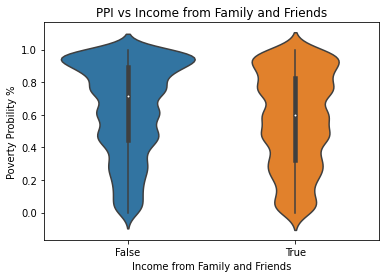

In [83]:
sns.violinplot(x ="income_friends_family_last_year", y ="poverty_probability",
data = df, split = True,)
plt.title('PPI vs Income from Family and Friends') 
plt.xlabel('Income from Family and Friends')
plt.ylabel('Poverty Probility %')

### Income: from Gov

Text(0, 0.5, 'Count of People')

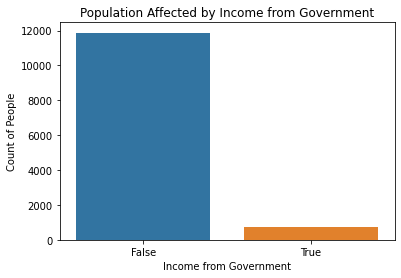

In [84]:
ax= sns.countplot(x="income_government_last_year", data=df, )
plt.title('Population Affected by Income from Government') 
plt.xlabel('Income from Government')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

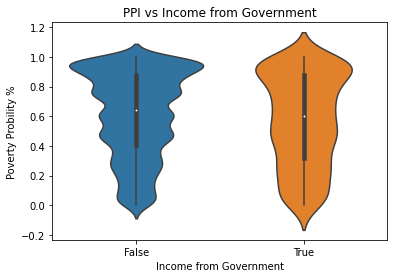

In [85]:
sns.violinplot(x ="income_government_last_year", y ="poverty_probability",
data = df, split = True,)
plt.title('PPI vs Income from Government') 
plt.xlabel('Income from Government')
plt.ylabel('Poverty Probility %')

### Income: from Own Business

Text(0, 0.5, 'Count of People')

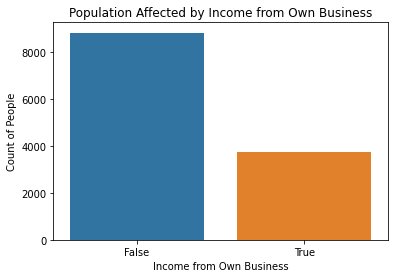

In [86]:
ax= sns.countplot(x="income_own_business_last_year", data=df, )
plt.title('Population Affected by Income from Own Business') 
plt.xlabel('Income from Own Business')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

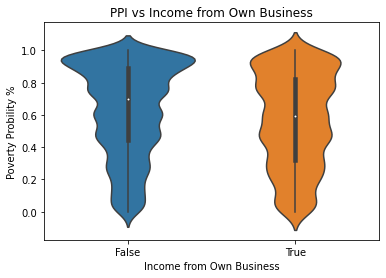

In [87]:
sns.violinplot(x ="income_own_business_last_year", y ="poverty_probability",
data = df, split = True,)
plt.title('PPI vs Income from Own Business') 
plt.xlabel('Income from Own Business')
plt.ylabel('Poverty Probility %')

### Income: from Private Sector

Text(0, 0.5, 'Count of People')

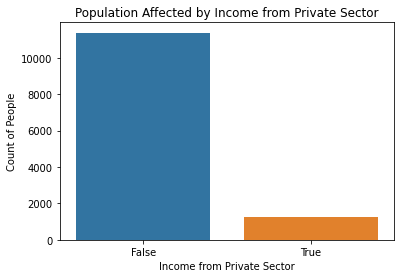

In [88]:
ax= sns.countplot(x="income_private_sector_last_year", data=df, )
plt.title('Population Affected by Income from Private Sector') 
plt.xlabel('Income from Private Sector')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

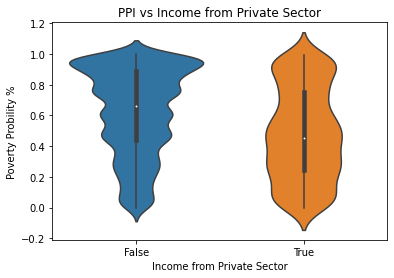

In [89]:
sns.violinplot(x ="income_private_sector_last_year", y ="poverty_probability",
data = df, split = True,)
plt.title('PPI vs Income from Private Sector') 
plt.xlabel('Income from Private Sector')
plt.ylabel('Poverty Probility %')

### Income: from Public Sector

Text(0, 0.5, 'Count of People')

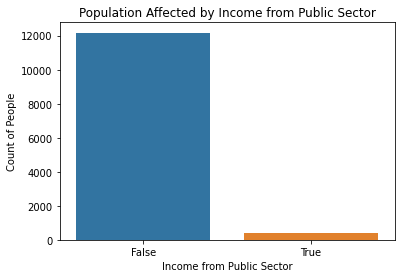

In [90]:
ax= sns.countplot(x="income_public_sector_last_year", data=df, )
plt.title('Population Affected by Income from Public Sector') 
plt.xlabel('Income from Public Sector')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

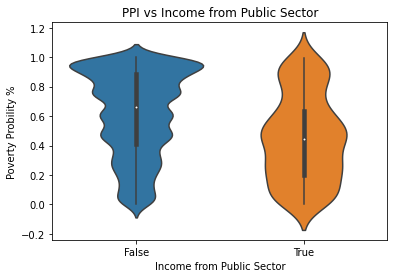

In [91]:
sns.violinplot(x ="income_public_sector_last_year", y ="poverty_probability",
data = df, split = True,)
plt.title('PPI vs Income from Public Sector') 
plt.xlabel('Income from Public Sector')
plt.ylabel('Poverty Probility %')

### Fromal Savings

Text(0, 0.5, 'Count of People')

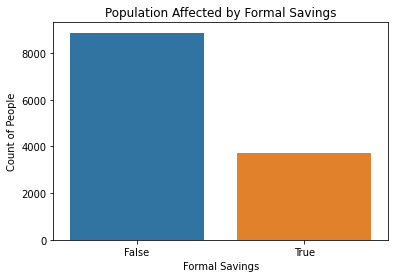

In [92]:
ax= sns.countplot(x="formal_savings", data=df, )
plt.title('Population Affected by Formal Savings') 
plt.xlabel('Formal Savings')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

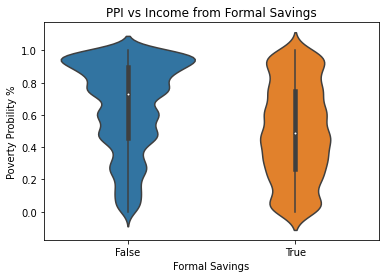

In [93]:
sns.violinplot(x ="formal_savings", y ="poverty_probability",
data = df, split = True,)
plt.title('PPI vs Income from Formal Savings') 
plt.xlabel('Formal Savings')
plt.ylabel('Poverty Probility %')

### Investments

Text(0, 0.5, 'Count of People')

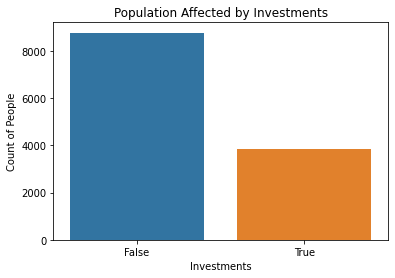

In [98]:
ax= sns.countplot(x="has_investment", data=df, )
plt.title('Population Affected by Investments') 
plt.xlabel('Investments')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

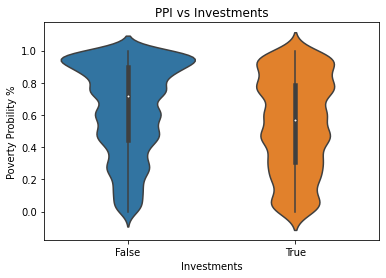

In [99]:
sns.violinplot(x ="has_investment", y ="poverty_probability",
data = df, split = True,)
plt.title('PPI vs Investments') 
plt.xlabel('Investments')
plt.ylabel('Poverty Probility %')

### Borrowed for Emergency

Text(0, 0.5, 'Count of People')

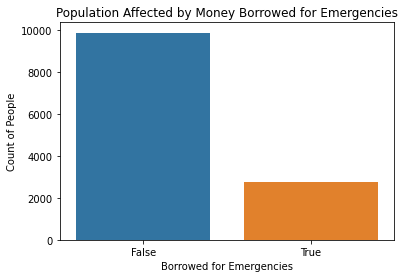

In [100]:
ax= sns.countplot(x="borrowed_for_emergency_last_year", data=df, )
plt.title('Population Affected by Money Borrowed for Emergencies') 
plt.xlabel('Money Borrowed for Emergencies')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

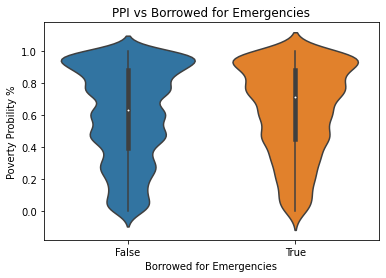

In [101]:
sns.violinplot(x ="borrowed_for_emergency_last_year", y ="poverty_probability",
data = df, split = True,)
plt.title('PPI vs Money Borrowed for Emergencies') 
plt.xlabel('Money Borrowed for Emergencies')
plt.ylabel('Poverty Probility %')

### Borrowed for Daily Expenses

Text(0, 0.5, 'Count of People')

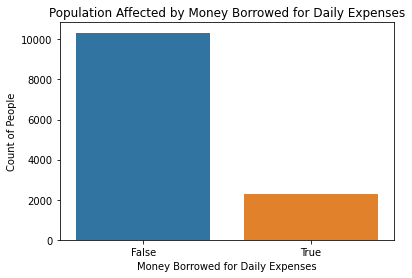

In [102]:
ax= sns.countplot(x="borrowed_for_daily_expenses_last_year", data=df, )
plt.title('Population Affected by Money Borrowed for Daily Expenses') 
plt.xlabel('Money Borrowed for Daily Expenses')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

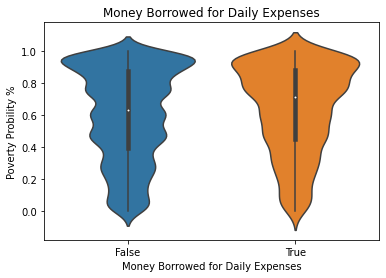

In [103]:
sns.violinplot(x ="borrowed_for_daily_expenses_last_year", y ="poverty_probability",
data = df, split = True,)
plt.title('Money Borrowed for Daily Expenses') 
plt.xlabel('Money Borrowed for Daily Expenses')
plt.ylabel('Poverty Probility %')

### Borrowed for Home or business

Text(0, 0.5, 'Count of People')

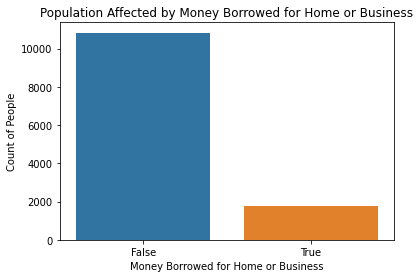

In [107]:
ax= sns.countplot(x="borrowed_for_home_or_biz_last_year", data=df, )
plt.title('Population Affected by Money Borrowed for Home or Business') 
plt.xlabel('Money Borrowed for Home or Business')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

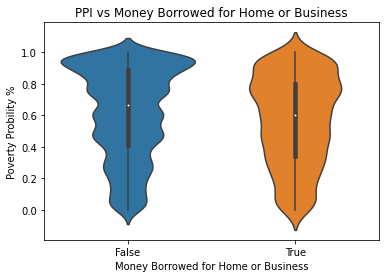

In [106]:
sns.violinplot(x ="borrowed_for_home_or_biz_last_year", y ="poverty_probability",
data = df, split = True,)
plt.title('PPI vs Money Borrowed for Home or Business') 
plt.xlabel('Money Borrowed for Home or Business')
plt.ylabel('Poverty Probility %')

### Regular Bank Account

Text(0, 0.5, 'Count of People')

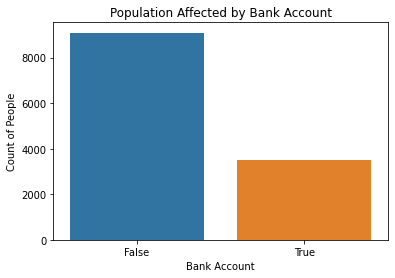

In [108]:
ax= sns.countplot(x="reg_bank_acct", data=df, )
plt.title('Population Affected by Bank Account') 
plt.xlabel('Bank Account')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

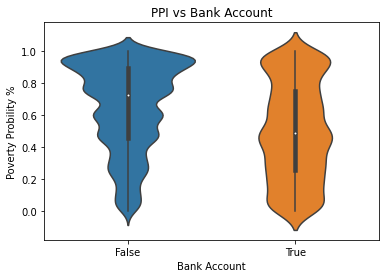

In [109]:
sns.violinplot(x ="reg_bank_acct", y ="poverty_probability",
data = df, split = True,)
plt.title('PPI vs Bank Account') 
plt.xlabel('Bank Account')
plt.ylabel('Poverty Probility %')

### Active Bank User

Text(0, 0.5, 'Count of People')

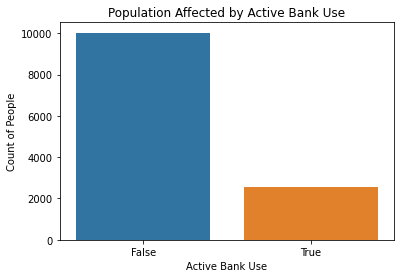

In [110]:
ax= sns.countplot(x="active_bank_user", data=df, )
plt.title('Population Affected by Active Bank Use') 
plt.xlabel('Active Bank Use')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

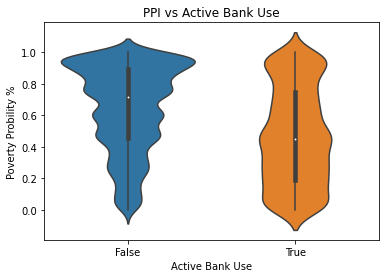

In [111]:
sns.violinplot(x ="active_bank_user", y ="poverty_probability",
data = df, split = True,)
plt.title('PPI vs Active Bank Use') 
plt.xlabel('Active Bank Use')
plt.ylabel('Poverty Probility %')

### Money Market Account

Text(0, 0.5, 'Count of People')

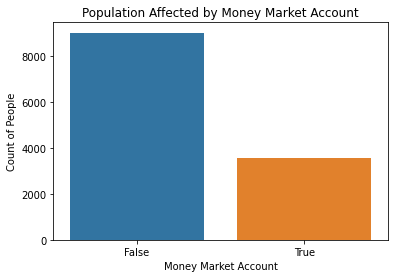

In [112]:
ax= sns.countplot(x="reg_mm_acct", data=df, )
plt.title('Population Affected by Money Market Account') 
plt.xlabel('Money Market Account')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

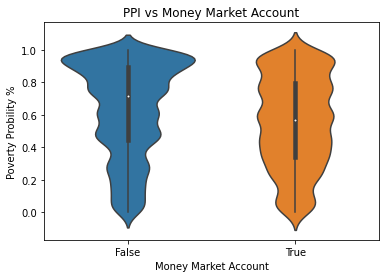

In [113]:
sns.violinplot(x ="reg_mm_acct", y ="poverty_probability",
data = df, split = True,)
plt.title('PPI vs Money Market Account') 
plt.xlabel('Money Market Account')
plt.ylabel('Poverty Probility %')

### Active Money Market Account

Text(0, 0.5, 'Count of People')

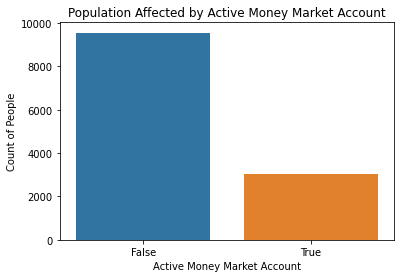

In [114]:
ax= sns.countplot(x="active_mm_user", data=df, )
plt.title('Population Affected by Active Money Market Account') 
plt.xlabel('Active Money Market Account')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

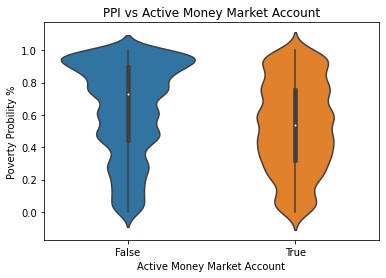

In [115]:
sns.violinplot(x ="active_mm_user", y ="poverty_probability",
data = df, split = True,)
plt.title('PPI vs Active Money Market Account') 
plt.xlabel('Active Money Market Account')
plt.ylabel('Poverty Probility %')

### Non-Bank Financial Institutions

Text(0, 0.5, 'Count of People')

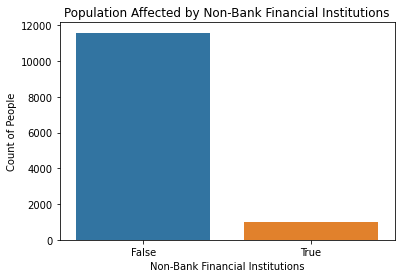

In [116]:
ax= sns.countplot(x="reg_formal_nbfi_account", data=df, )
plt.title('Population Affected by Non-Bank Financial Institutions') 
plt.xlabel('Non-Bank Financial Institutions')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

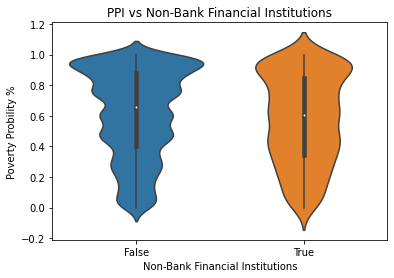

In [117]:
sns.violinplot(x ="reg_formal_nbfi_account", y ="poverty_probability",
data = df, split = True,)
plt.title('PPI vs Non-Bank Financial Institutions') 
plt.xlabel('Non-Bank Financial Institutions')
plt.ylabel('Poverty Probility %')

### Active Non-Bank Financial Institutions 

Text(0, 0.5, 'Count of People')

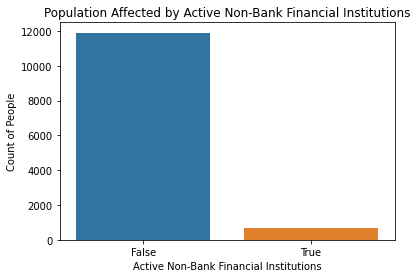

In [119]:
ax= sns.countplot(x="active_formal_nbfi_user", data=df, )
plt.title('Population Affected by Active Non-Bank Financial Institutions') 
plt.xlabel('Active Non-Bank Financial Institutions')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

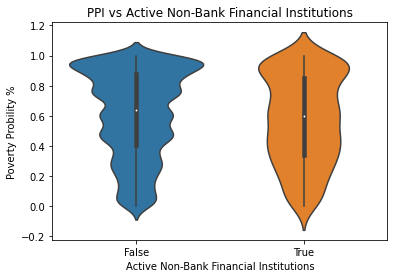

In [118]:
sns.violinplot(x ="active_formal_nbfi_user", y ="poverty_probability",
data = df, split = True,)
plt.title('PPI vs Active Non-Bank Financial Institutions') 
plt.xlabel('Active Non-Bank Financial Institutions')
plt.ylabel('Poverty Probility %')

### Insurance

Text(0, 0.5, 'Count of People')

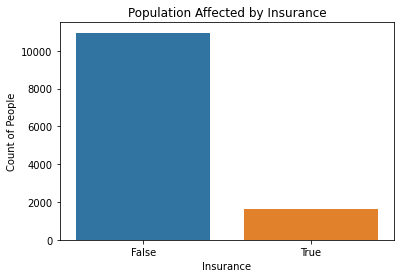

In [120]:
ax= sns.countplot(x="has_insurance", data=df, )
plt.title('Population Affected by Insurance') 
plt.xlabel('Insurance')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

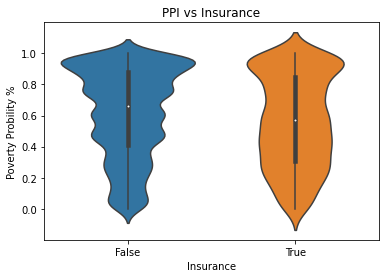

In [121]:
sns.violinplot(x ="has_insurance", y ="poverty_probability",
data = df, split = True,)
plt.title('PPI vs Insurance') 
plt.xlabel('Insurance')
plt.ylabel('Poverty Probility %')

### Phone

Text(0, 0.5, 'Count of People')

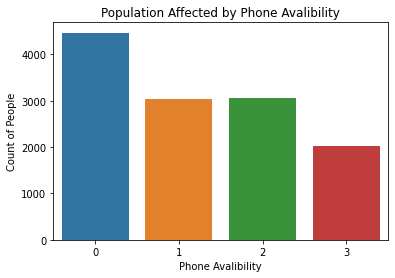

In [122]:
ax= sns.countplot(x="phone_technology", data=df, )
plt.title('Population Affected by Phone Avalibility') 
plt.xlabel('Phone Avalibility')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

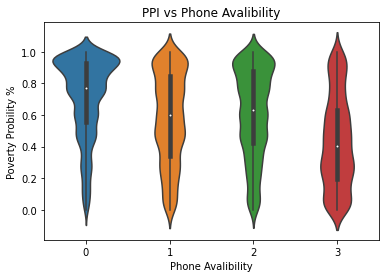

In [123]:
sns.violinplot(x ="phone_technology", y ="poverty_probability",
data = df, split = True,)
plt.title('PPI vs Phone Avalibility') 
plt.xlabel('Phone Avalibility')
plt.ylabel('Poverty Probility %')

### Able to Call

Text(0, 0.5, 'Count of People')

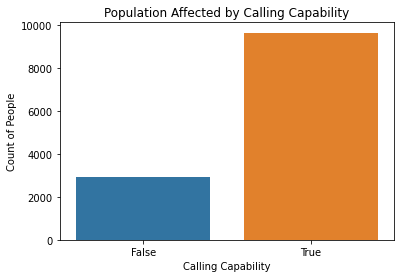

In [140]:
ax= sns.countplot(x="can_call", data=df, )
plt.title('Population Affected by Calling Capability') 
plt.xlabel('Calling Capability')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

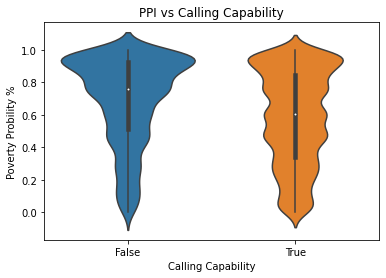

In [141]:
sns.violinplot(x ="can_call", y ="poverty_probability",
data = df, split = True,)
plt.title('PPI vs Calling Capability') 
plt.xlabel('Calling Capability')
plt.ylabel('Poverty Probility %')

### Able to Text

Text(0, 0.5, 'Count of People')

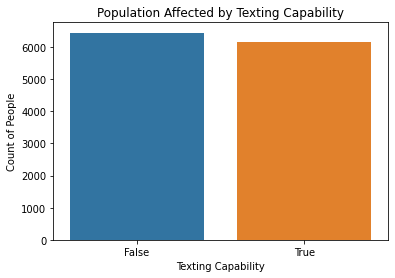

In [138]:
ax= sns.countplot(x="can_text", data=df, )
plt.title('Population Affected by Texting Capability') 
plt.xlabel('Texting Capability')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

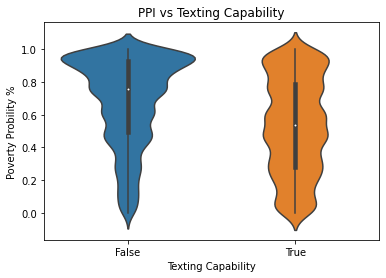

In [139]:
sns.violinplot(x ="can_text", y ="poverty_probability",
data = df, split = True,)
plt.title('PPI vs Texting Capability') 
plt.xlabel('Texting Capability')
plt.ylabel('Poverty Probility %')

###Able to use Internet

Text(0, 0.5, 'Count of People')

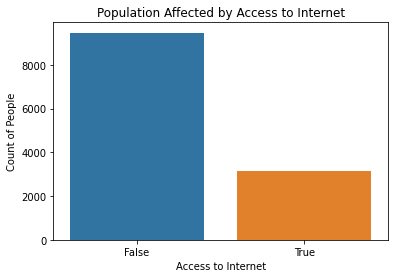

In [131]:
ax= sns.countplot(x="can_use_internet", data=df, )
plt.title('Population Affected by Access to Internet') 
plt.xlabel('Access to Internet')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

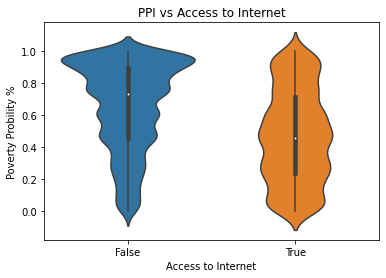

In [130]:
sns.violinplot(x ="can_use_internet", y ="poverty_probability",
data = df, split = True,)
plt.title('PPI vs Access to Internet') 
plt.xlabel('Access to Internet')
plt.ylabel('Poverty Probility %')

### Transaction

Text(0, 0.5, 'Count of People')

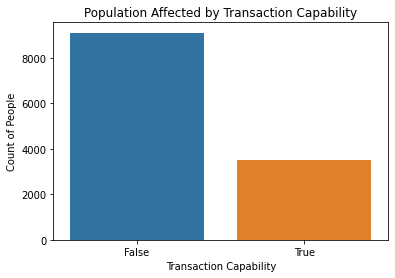

In [136]:
ax= sns.countplot(x="can_make_transaction", data=df, )
plt.title('Population Affected by Transaction Capability') 
plt.xlabel('Transaction Capability')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

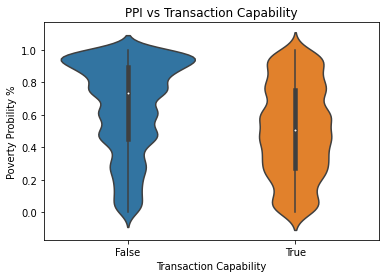

In [137]:
sns.violinplot(x ="can_make_transaction", y ="poverty_probability",
data = df, split = True,)
plt.title('PPI vs Transaction Capability') 
plt.xlabel('Transaction Capability')
plt.ylabel('Poverty Probility %')

###Phone Ownership

Text(0, 0.5, 'Count of People')

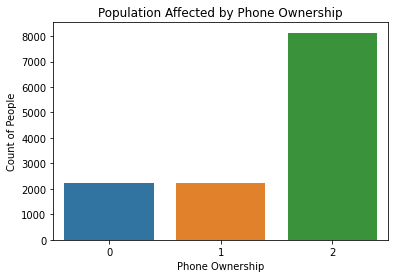

In [134]:
ax= sns.countplot(x="phone_ownership", data=df, )
plt.title('Population Affected by Phone Ownership') 
plt.xlabel('Phone Ownership')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

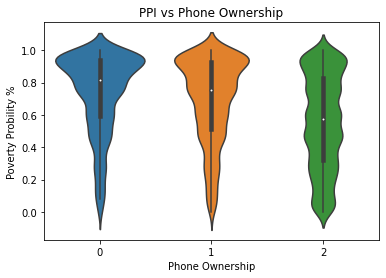

In [135]:
sns.violinplot(x ="phone_ownership", y ="poverty_probability",
data = df, split = True,)
plt.title('PPI vs Phone Ownership') 
plt.xlabel('Phone Ownership')
plt.ylabel('Poverty Probility %')

### financial activities

Text(0, 0.5, 'Count of People')

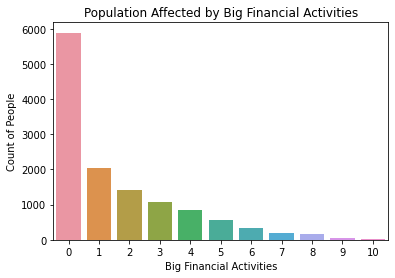

In [142]:
ax= sns.countplot(x="num_financial_activities_last_year", data=df, )
plt.title('Population Affected by Big Financial Activities') 
plt.xlabel('Big Financial Activities')
plt.ylabel('Count of People')

Text(0, 0.5, 'Poverty Probility %')

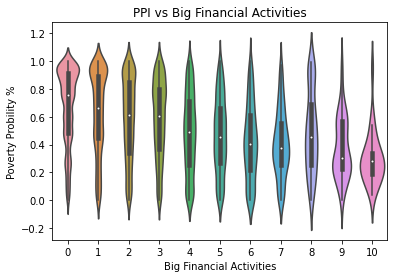

In [143]:
sns.violinplot(x ="num_financial_activities_last_year", y ="poverty_probability",
data = df, split = True,)
plt.title('PPI vs Big Financial Activities') 
plt.xlabel('Big Financial Activities')
plt.ylabel('Poverty Probility %')

In [144]:
df.num_financial_activities_last_year.value_counts(normalize= True)*100

0     46.722222
1     16.206349
2     11.301587
3      8.555556
4      6.674603
5      4.460317
6      2.650794
7      1.634921
8      1.206349
9      0.380952
10     0.206349
Name: num_financial_activities_last_year, dtype: float64

In [79]:
df.head()

,row_id,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,can_add,can_divide,can_calc_percents,can_calc_compounding,employed_last_year,employment_category_last_year,employment_type_last_year,share_hh_income_provided,income_ag_livestock_last_year,income_friends_family_last_year,income_government_last_year,income_own_business_last_year,income_private_sector_last_year,income_public_sector_last_year,num_times_borrowed_last_year,borrowing_recency,formal_savings,informal_savings,cash_property_savings,has_insurance,has_investment,num_shocks_last_year,avg_shock_strength_last_year,borrowed_for_emergency_last_year,borrowed_for_daily_expenses_last_year,borrowed_for_home_or_biz_last_year,phone_technology,can_call,can_text,can_use_internet,can_make_transaction,phone_ownership,advanced_phone_use,reg_bank_acct,reg_mm_acct,reg_formal_nbfi_account,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability,agebin
0,0,C,False,18,True,True,P,Other,1.0,True,True,True,True,True,False,housewife_or_student,not_working,1.0,False,False,False,False,False,False,0,0,False,False,False,False,False,0,0.0,False,False,False,0,True,True,False,False,1,False,True,False,False,True,True,False,False,False,False,1,0,1,0.515,>=18-<30
1,1,C,True,30,True,True,P,Other,1.0,True,True,True,False,False,False,housewife_or_student,not_working,NaN,False,False,False,False,False,False,0,0,False,False,False,False,False,0,0.0,False,False,False,1,True,False,False,False,2,False,True,False,False,True,True,False,False,False,False,1,0,0,0.981,>=30-<40
2,2,A,False,20,True,True,Q,Spouse,1.0,True,True,True,True,False,True,employed,irregular_seasonal,1.0,False,False,False,False,False,False,1,2,False,False,False,False,False,0,0.0,False,False,False,1,True,False,False,False,2,False,False,False,False,False,False,False,False,False,False,0,0,0,0.982,>=18-<30
3,3,A,False,61,False,True,Q,Head,0.0,False,True,True,False,True,True,employed,self_employed,NaN,False,False,False,False,False,False,0,0,False,False,False,False,False,0,0.0,False,False,False,0,True,False,False,False,0,False,False,False,False,False,False,False,False,False,False,0,0,0,0.879,>=60-<80
4,4,D,False,26,True,True,X,Spouse,1.0,True,False,True,False,False,False,housewife_or_student,not_working,2.0,False,True,False,False,False,False,0,0,False,False,True,False,False,0,0.0,False,False,False,0,True,True,False,True,1,False,False,False,False,False,False,False,False,False,False,1,0,3,0.796,>=18-<30


In [59]:
df.describe()

,row_id,age,education_level,share_hh_income_provided,num_times_borrowed_last_year,borrowing_recency,num_shocks_last_year,avg_shock_strength_last_year,phone_technology,phone_ownership,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability
count,12600.000000,12600.000000,12364.000000,12295.000000,12600.000000,12600.000000,12600.000000,12600.000000,12600.00000,12600.000000,12600.000000,12600.000000,12600.000000,12600.000000
mean,6299.500000,36.280714,1.316241,2.888166,0.657698,0.866429,1.100159,2.112765,1.20873,1.468254,0.714127,0.188968,1.559683,0.611272
std,3637.451031,15.145945,0.905442,1.564284,0.924598,0.960866,1.190072,2.019239,1.09306,0.776638,0.805878,0.473696,2.043831,0.291476
min,0.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3149.750000,25.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.394000
50%,6299.500000,33.000000,1.000000,2.000000,0.000000,0.000000,1.000000,2.000000,1.00000,2.000000,1.000000,0.000000,1.000000,0.633000
75%,9449.250000,45.000000,2.000000,5.000000,1.000000,2.000000,2.000000,4.000000,2.00000,2.000000,1.000000,0.000000,3.000000,0.879000
max,12599.000000,115.000000,3.000000,5.000000,3.000000,2.000000,5.000000,5.000000,3.00000,2.000000,6.000000,4.000000,10.000000,1.000000


#Summary

### Demographics 

1. Sex- Females are more likely to be in poverty. 
2. Age- No major discrepancies.
3. Country- Countries A, D and C are more likely to be in poverty.
4. Urban Settings- Non-urban people are more likely to be in poverty.
5. Religion- Religion N was more likely to be in poverty followed by P and Q
6. Marital Status- Non married Females and married couples are more likely to be in poverty.
7. Family Member Status- Every member besides sister/brother field were likely to be in poverty. 

### Large Reduction to Poverty

1. Income: Public Sector- Little given out but dramatically reduced chance of poverty. 
2. Income: Private sector- Little given out but also helped a lot to reduce chance of poverty.
3. Formal Savings- Having savings dramatically reduced chance of poverty. 
4. Bank Account and Active use- dramatically reduced chance of poverty. 
5. Money Market Account and Active Use - dramatically reduces chance of poverty. 
6. Internet and Transaction Capability- dramatically reduces chance of poverty. 

### Moderate Reduction to Poverty

1. Education- People with lower education level are more likely to be in poverty.  
2. Literacy- Inability to read linked to likely more poverty. 
3. Insurance- People with insurance reduces the chance of poverty. 
4. Income: Family and Friends- Help reduces the chance of poverty
5. Financial Activity- Higher the PPI= less activities a person can do.
6. Phone- Access to/owning 2 phones reduces chances of poverty.
7. Call and Text Capability- Both reduces changes of poverty, esp being able to text. 


###Very Little Reduction to No Change in Poverty

1. Income: Government- Help given by government was very sparce but did help a little. 
2. NBFI- No change to very little reduction in chances of  poverty.
3. Income: Own Business- Helped reduce chance of poverty a little. 
4. Investments- Helped reduce chance of poverty a little. 
5. Year Employment- Being employed reduces the chance of poverty but not a substantial amount. 

### Increased Chances of Poverty

1.  Income: Livestock- Livestock seems to increase the chance of poverty.
2. Money Borrowed- borrowing increased the chance of poverty unless it was for home or business reasons. 